<a href="https://colab.research.google.com/github/ducsuibot/hiura-mihate/blob/main/sos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt

1. dữ liệu

In [17]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
print(X_train)
print(y_train)

[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
[460 232 178]


2. Hàm thay đoán 1 phát

In [18]:
def predict(x,w,b):
  y_hat=np.dot(x,w)+b
  return y_hat

3. Test thử hàng 1

In [19]:
w = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
b = 785.1811367994083
print(predict(X_train[0,:],w,b))

459.9999976194083


4. Tính hàm chi phí Cost

In [31]:
def cost(x,y,w,b):
  m,n = x.shape
  error = 0.0
  for i in range(m):
    y_hat = np.dot(x[i],w) + b
    error += (y_hat-y[i])**2
  cost = error/(2*m)
  return cost



5. Tính thử hàm chi phí với dữ liệu và đường cong cho sẵn

In [32]:
print(cost(X_train,y_train,w,b))

1.5578904428966628e-12


6. Tính Gradient

In [33]:
def gradient(X_train,y_train,w,b):
  m,n = X_train.shape
  dw = 0.0
  db = 0.0
  error = 0.0
  for i in range(m):
    y_hat = np.dot(w,X_train[i])+b
    error = y_hat - y_train[i]
    dw += error*X_train[i]
    db += error
  dw /= m
  db /= m
  return dw,db

7. Tính thử gradient dw db vs các dữ liệu và đường cong cho trước

In [34]:
print(gradient(X_train,y_train,w,b))

(array([-2.72623577e-03, -6.27197263e-06, -2.21745578e-06, -6.92403391e-05]), np.float64(-1.6739251501955248e-06))


8. Chỉnh lại trọng số bằng cách dùng gradient => Chi phí auto giảm

In [35]:
def gradient_descent(X_train,y_train,w,b,learning_rate,epochs):
  j_history=[]
  for i in range(epochs):
    dw,db = gradient(X_train,y_train,w,b)
    w = w - learning_rate*dw
    b = b - learning_rate*db
    j_history.append(cost(X_train,y_train,w,b))
    if i % (epochs/10) == 0:
      print(f"epoch {i} : cost = {j_history[i]}")
  return w,b,j_history

9. chill time:

In [74]:
m,n = X_train.shape
w = np.zeros(n)
b = 0.0
epochs = 1000000
learning_rate = 5.0e-7
w_final,b_final,j_final = gradient_descent(X_train,y_train,w,b,learning_rate,epochs)
print(w_final,b_final)


epoch 0 : cost = 2529.4629522316304
epoch 100000 : cost = 563.2536222813027
epoch 200000 : cost = 550.0490577906063
epoch 300000 : cost = 537.1698026884834
epoch 400000 : cost = 524.5921141448363
epoch 500000 : cost = 512.3089288447975
epoch 600000 : cost = 500.31335107267813
epoch 700000 : cost = 488.598646574449
epoch 800000 : cost = 477.1582387768467
epoch 900000 : cost = 465.98570509534034
[ 0.23379655  2.63288293 -7.41311843 -1.24930407] 0.08736063337565142


9. Thử nghiệm kết quả

In [75]:
for i in range(m):
  y_hat = np.dot(w_final,X_train[i])+b
  print(y_hat,y_train[i])

441.44055497992974 460
274.15616438732513 232
153.3216658369238 178


10. Vẽ

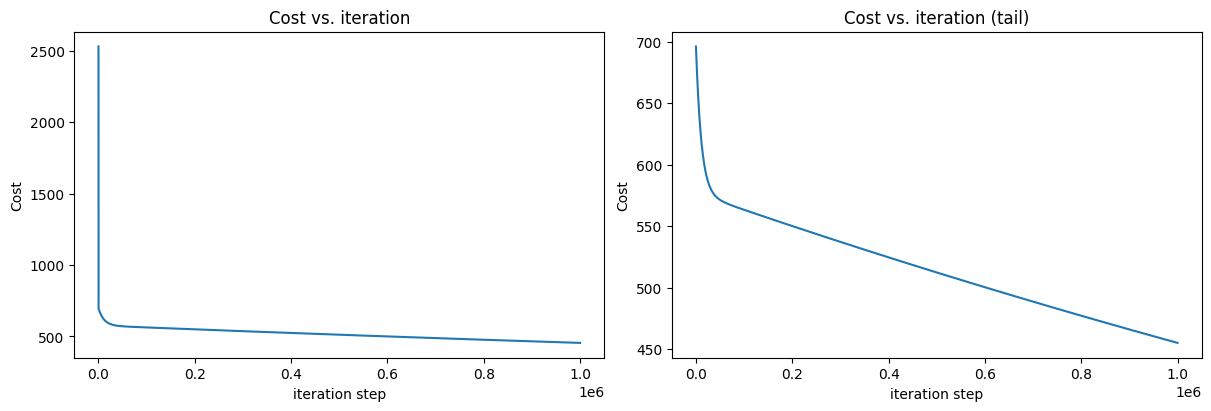

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(j_final)
ax2.plot(100 + np.arange(len(j_final[100:])), j_final[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()